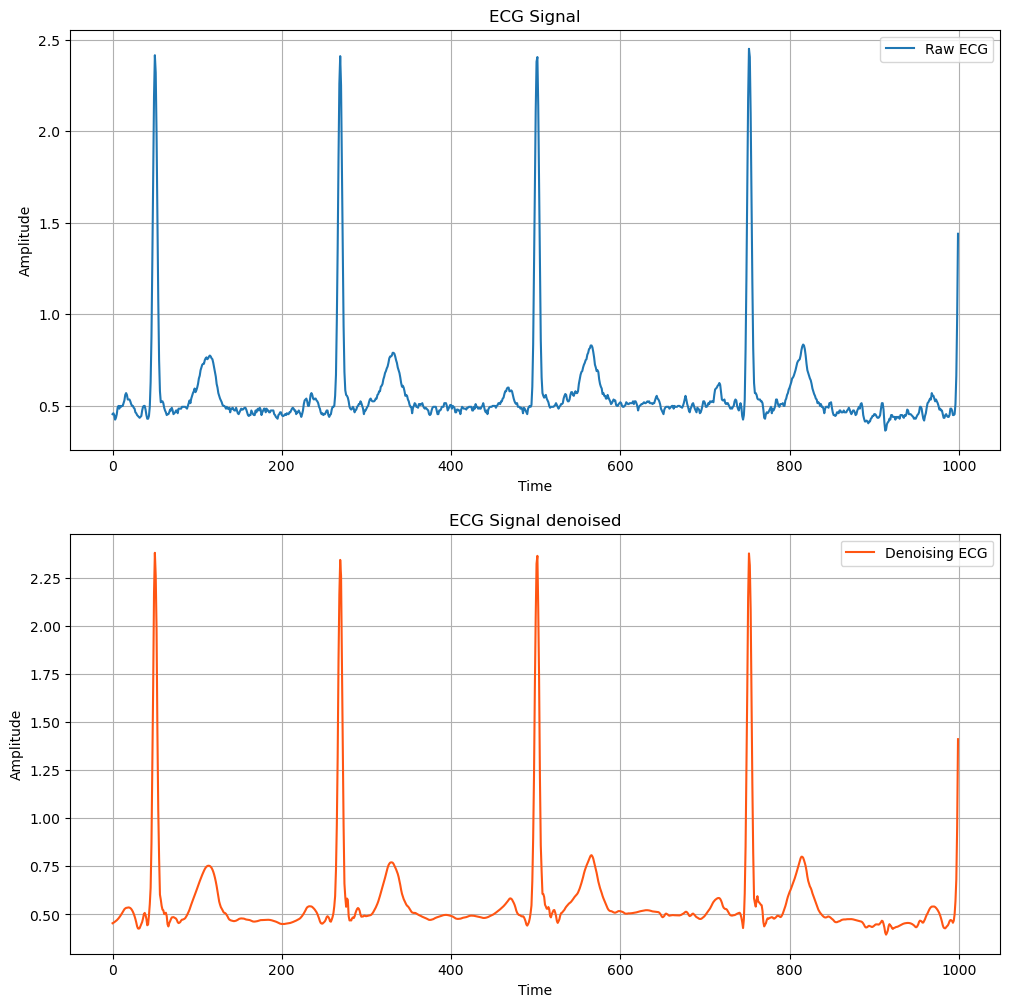

In [18]:
import numpy as np
import wfdb
from scipy import signal as scipy_signal
import matplotlib.pyplot as plt
import pywt

# Load ECG signal
record = wfdb.rdrecord('D:/3rd Biomedical/2nd semister/MedicalSignals/Project/DataBase2/european-st-t-database-1.0.0/e0103')  # Replace 'sample_record' with your record name
ecg_signal = record.p_signal[:,0]

# 3. Noise Reduction
# Apply wavelet denoising
def wavelet_denoising(signal, wavelet='db4', level=4):
    # Decompose signal into wavelet coefficients
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Set threshold for coefficients
    threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(signal)))

    # Apply soft thresholding to the detail coefficients
    denoised_coeffs = [pywt.threshold(detail_coeff, threshold, mode='soft') for detail_coeff in coeffs[1:]]

    # Reconstruct denoised signal
    denoised_signal = pywt.waverec([coeffs[0]] + denoised_coeffs, wavelet)
    
    return denoised_signal
denoised_ecg=wavelet_denoising(ecg_signal)
# 4. Visualization
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
plt.plot(ecg_signal[:1000], label='Raw ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(denoised_ecg[:1000],label='Denoising ECG',color='#FF5513')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal denoised')
plt.legend()
plt.grid(True)
plt.show()


D:\anaconda\Lib\site-packages\scipy\signal\_signaltools.py:1657: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
D:\anaconda\Lib\site-packages\scipy\signal\_signaltools.py:1657: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


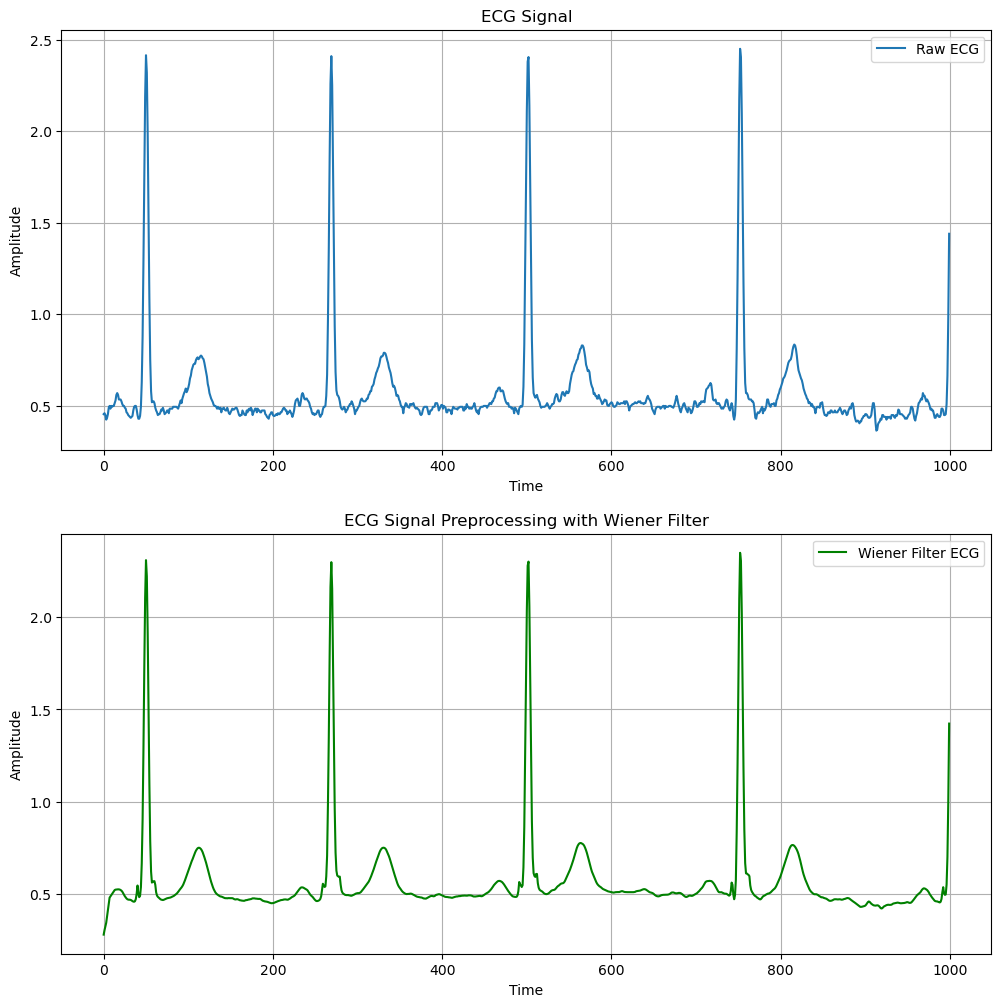

In [13]:
from scipy.signal import wiener

# Apply Wiener filter to ECG signal
ecg_wiener = wiener(ecg_signal, mysize=15)
# Plotting the results
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(ecg_signal[:1000], label='Raw ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(ecg_wiener[:1000], label='Wiener Filter ECG',color='green')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal Preprocessing with Wiener Filter')
plt.legend()
plt.grid(True)
plt.show()


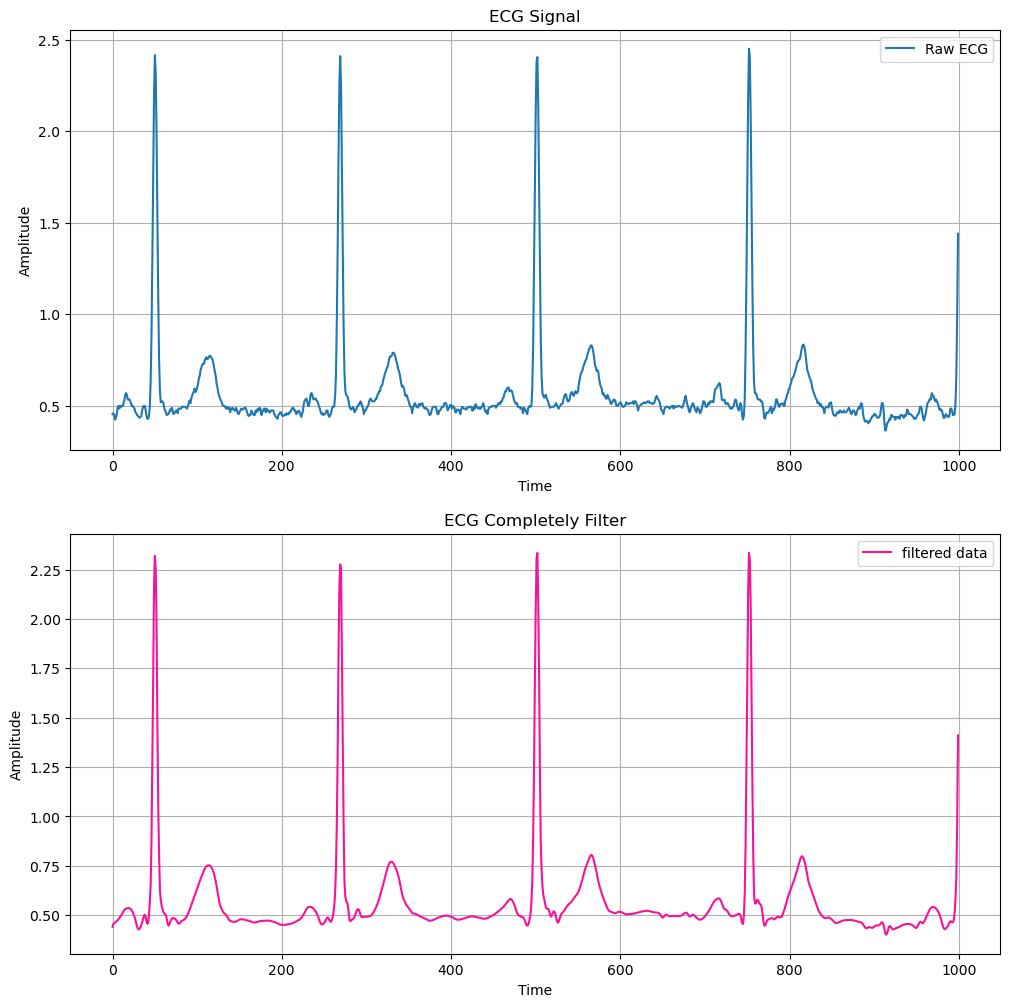

In [20]:
filter_ecg=wavelet_denoising(ecg_signal)
filter_ecg=wiener(filter_ecg)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(ecg_signal[:1000], label='Raw ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(filter_ecg[:1000], label='filtered data',color='#fa1199')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Completely Filter')
plt.legend()
plt.grid(True)
plt.show()